In [10]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

In [11]:
df = pd.read_csv("BAC.csv", parse_dates=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-11,17.080000,17.490000,16.969999,17.160000,15.332118,188202400
1,2010-05-12,17.270000,17.330000,16.990000,17.070000,15.251707,179359300
2,2010-05-13,17.030001,17.180000,16.850000,16.870001,15.073014,135257500
3,2010-05-14,16.709999,16.719999,16.120001,16.340000,14.599466,212906900
4,2010-05-17,16.389999,16.450001,15.850000,16.350000,14.608404,181966800


In [13]:
data = df.drop("Date", axis=1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,17.080000,17.490000,16.969999,17.160000,15.332118,188202400
1,17.270000,17.330000,16.990000,17.070000,15.251707,179359300
2,17.030001,17.180000,16.850000,16.870001,15.073014,135257500
3,16.709999,16.719999,16.120001,16.340000,14.599466,212906900
4,16.389999,16.450001,15.850000,16.350000,14.608404,181966800


### Standard Scaler with 0 Mean and 1 standard deviation

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data))

scaler = scaler.transform(data)
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.15655659 -0.12705317 -0.14578222 -0.14507144 -0.23683014  0.89934761]
 [-0.13194309 -0.14763062 -0.14317488 -0.15672057 -0.24714678  0.79052642]
 [-0.16303369 -0.16692197 -0.16142535 -0.18260742 -0.27007287  0.24781965]
 ...
 [ 0.61034798  0.59187141  0.53991415  0.5266955   0.66355569 -0.7536599 ]
 [ 0.56630278  0.62916816  0.58945127  0.59011858  0.7264221  -0.77815208]
 [ 0.67123385  0.66132043  0.67288186  0.68460603  0.82008022 -0.86064137]]


### t-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [24]:
X_embedded = TSNE(n_components=1).fit_transform(scaler)
X_embedded.shape

(2517, 1)

In [25]:
y = np.arange(0,2517,1)
print(y.shape)

(2517,)


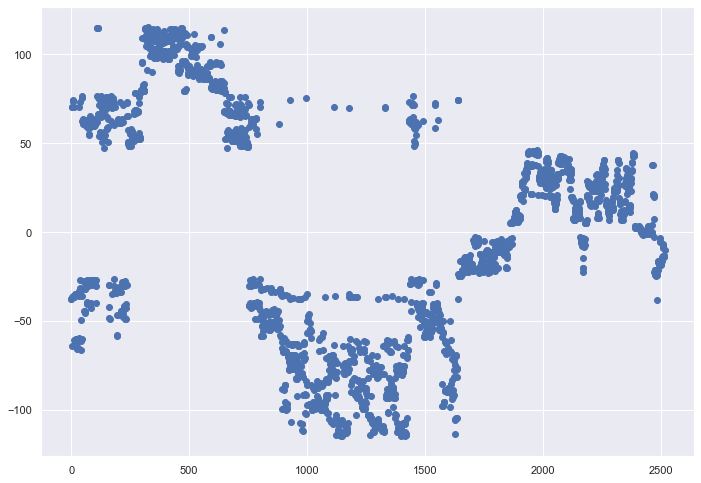

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
plt.scatter(y, X_embedded)
plt.show()